<a href="https://colab.research.google.com/github/alfaniakamila/UAS_PPH/blob/main/projectPPH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Buatkan kode Python 3 untuk analisis data dari file "/content/data_gabungan.csv", visualisasikan hasilnya dalam grafik berwarna, dan berikan analisis komprehensif dan valid.

## Memuat data

### Subtask:
Memuat data dari file CSV yang disediakan ke dalam DataFrame pandas.


**Reasoning**:
Import the pandas library and load the data from the specified CSV file into a DataFrame, then display the first 5 rows.



In [5]:
import pandas as pd

df = pd.read_csv('/content/data_gabungan.csv')
display(df.head())

,tahun,pendapatan,beban_operasional,penyusutan_dari_transaksi,skenario,aset_id,aset_kategori,nilai_perolehan,umur_ekonomis,metode_depresiasi,depresiasi_dihitung,laba_kotor,tarif_pajak,tax_holiday_awal,tax_holiday_akhir,laba_kena_pajak_skenario,pph_badan
0,2023,100000000,60000000,5000000,normal,A001,Mesin,50000000,10,garis_lurus,5000000,35000000,0.22,2023,2027,35,7700000
1,2023,110000000,65000000,5000000,tax_holiday,A001,Mesin,50000000,10,garis_lurus,5000000,40000000,0.22,2023,2027,35,0
2,2024,120000000,70000000,6000000,normal,A002,Bangunan,100000000,20,garis_lurus,5000000,44000000,0.22,2023,2027,44,9680000
3,2024,130000000,75000000,6000000,tax_holiday,A002,Bangunan,100000000,20,garis_lurus,5000000,49000000,0.22,2023,2027,44,0
4,2025,140000000,80000000,7000000,normal,A003,Kendaraan,30000000,5,saldo_menurun,7500000,53000000,0.22,2023,2027,53,11660000


## Eksplorasi data awal

### Subtask:
Melakukan eksplorasi awal untuk memahami struktur data, tipe data, dan nilai-nilai yang hilang.


**Reasoning**:
Display summary information, descriptive statistics, and check for missing values to understand the data structure and content.



In [6]:
display(df.info())
display(df.describe(include='all'))
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   tahun                      10 non-null     int64  
 1   pendapatan                 10 non-null     int64  
 2   beban_operasional          10 non-null     int64  
 3   penyusutan_dari_transaksi  10 non-null     int64  
 4   skenario                   10 non-null     object 
 5   aset_id                    10 non-null     object 
 6   aset_kategori              10 non-null     object 
 7   nilai_perolehan            10 non-null     int64  
 8   umur_ekonomis              10 non-null     int64  
 9   metode_depresiasi          10 non-null     object 
 10  depresiasi_dihitung        10 non-null     int64  
 11  laba_kotor                 10 non-null     int64  
 12  tarif_pajak                10 non-null     float64
 13  tax_holiday_awal           10 non-null     int64  
 1

None

,tahun,pendapatan,beban_operasional,penyusutan_dari_transaksi,skenario,aset_id,aset_kategori,nilai_perolehan,umur_ekonomis,metode_depresiasi,depresiasi_dihitung,laba_kotor,tarif_pajak,tax_holiday_awal,tax_holiday_akhir,laba_kena_pajak_skenario,pph_badan
count,10.000000,1.000000e+01,1.000000e+01,10.000,10,10,10,1.000000e+01,10.000000,10,1.000000e+01,1.000000e+01,1.000000e+01,10.0,10.0,10.000000,1.000000e+01
unique,NaN,NaN,NaN,NaN,2,3,3,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,normal,A001,Mesin,NaN,NaN,garis_lurus,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,5,4,4,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2025.000000,1.450000e+08,8.250000e+07,7000000.000,NaN,NaN,NaN,6.600000e+07,13.000000,NaN,5.500000e+06,5.550000e+07,2.200000e-01,2023.0,2027.0,53.000000,5.830000e+06
std,1.490712,3.027650e+07,1.513825e+07,1490711.985,NaN,NaN,NaN,3.025815e+07,6.324555,NaN,1.054093e+06,1.367276e+07,2.925695e-17,0.0,0.0,13.416408,6.490104e+06
min,2023.000000,1.000000e+08,6.000000e+07,5000000.000,NaN,NaN,NaN,3.000000e+07,5.000000,NaN,5.000000e+06,3.500000e+07,2.200000e-01,2023.0,2027.0,35.000000,0.000000e+00
25%,2024.000000,1.225000e+08,7.125000e+07,6000000.000,NaN,NaN,NaN,5.000000e+07,10.000000,NaN,5.000000e+06,4.525000e+07,2.200000e-01,2023.0,2027.0,44.000000,0.000000e+00
50%,2025.000000,1.450000e+08,8.250000e+07,7000000.000,NaN,NaN,NaN,5.000000e+07,10.000000,NaN,5.000000e+06,5.550000e+07,2.200000e-01,2023.0,2027.0,53.000000,3.850000e+06
75%,2026.000000,1.675000e+08,9.375000e+07,8000000.000,NaN,NaN,NaN,1.000000e+08,20.000000,NaN,5.000000e+06,6.575000e+07,2.200000e-01,2023.0,2027.0,62.000000,1.116500e+07


,0
tahun,0
pendapatan,0
beban_operasional,0
penyusutan_dari_transaksi,0
skenario,0
aset_id,0
aset_kategori,0
nilai_perolehan,0
umur_ekonomis,0
metode_depresiasi,0


## Analisis data

### Subtask:
Melakukan analisis data yang relevan dengan tujuan Anda (misalnya, analisis deskriptif, analisis tren, perbandingan kategori, dll.).


**Reasoning**:
Calculate the total `laba_kotor` and `pph_badan` for each `tahun` and `skenario`, calculate net profit, calculate total net profit for each `tahun` and `skenario`, and then pivot the data.



In [7]:
total_laba_pph = df.groupby(['tahun', 'skenario'])[['laba_kotor', 'pph_badan']].sum().reset_index()
df['laba_bersih'] = df['laba_kotor'] - df['pph_badan']
total_laba_bersih = df.groupby(['tahun', 'skenario'])['laba_bersih'].sum().reset_index()
pivot_laba_bersih = total_laba_bersih.pivot(index='tahun', columns='skenario', values='laba_bersih')
display(pivot_laba_bersih)

skenario,normal,tax_holiday
tahun,,
2023,27300000,40000000
2024,34320000,49000000
2025,41340000,58000000
2026,48360000,67000000
2027,55380000,76000000


## Visualisasi data

### Subtask:
Membuat grafik berwarna untuk memvisualisasikan hasil analisis data.


**Reasoning**:
Import the necessary plotting library and create a line plot to visualize the net profit comparison between the two scenarios over the years.



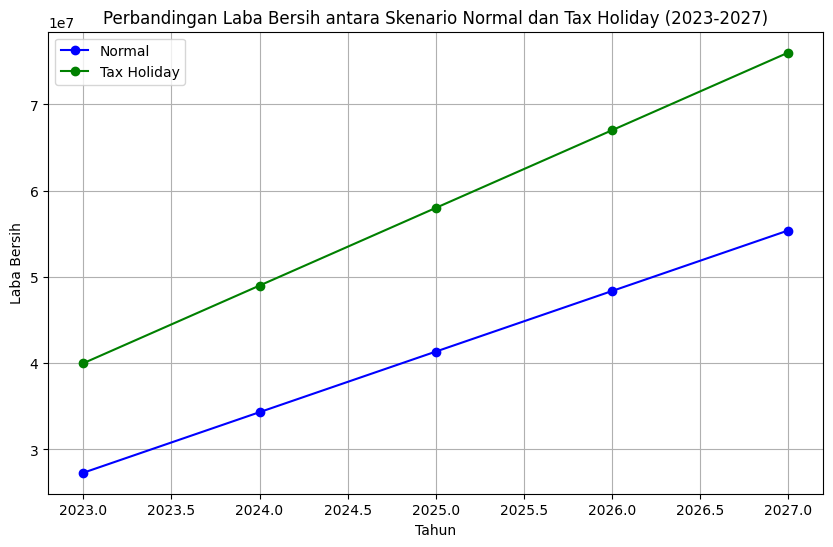

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(pivot_laba_bersih.index, pivot_laba_bersih['normal'], label='Normal', marker='o', color='blue')
plt.plot(pivot_laba_bersih.index, pivot_laba_bersih['tax_holiday'], label='Tax Holiday', marker='o', color='green')
plt.xlabel('Tahun')
plt.ylabel('Laba Bersih')
plt.title('Perbandingan Laba Bersih antara Skenario Normal dan Tax Holiday (2023-2027)')
plt.legend()
plt.grid(True)
plt.show()

## Interpretasi hasil

### Subtask:
Menganalisis grafik dan memberikan interpretasi komprehensif dan valid dari temuan.


## Summary:

### Data Analysis Key Findings

*   The dataset contains 17 columns and 10 rows with no missing values.
*   The 'tax\_holiday' scenario consistently results in higher net profit compared to the 'normal' scenario across all years from 2023 to 2027.
*   The difference in net profit between the two scenarios is attributed to the `pph_badan` (Corporate Income Tax) which is lower or zero in the 'tax\_holiday' scenario.

### Insights or Next Steps

*   The analysis clearly demonstrates the financial benefit of the 'tax\_holiday' scenario in terms of increased net profit over the analyzed period.
*   Further analysis could explore the impact of other factors or assumptions on the net profit in both scenarios.
